In [53]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Dataset_Day7.csv')
display(df.head())
display(df.info())

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,33.6,0.627,50,1
1,1,85,66,26.6,0.351,31,0
2,8,183,64,23.3,0.672,32,1
3,1,89,66,28.1,0.167,21,0
4,0,137,40,43.1,2.288,33,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   BMI                       768 non-null    float64
 4   DiabetesPedigreeFunction  768 non-null    float64
 5   Age                       768 non-null    int64  
 6   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 42.1 KB


None

In [54]:
temp = df

## Missing Value Detection & treatment

MV = (temp[["Glucose","BloodPressure","BMI","DiabetesPedigreeFunction"]] == 0).sum()
print("% of Missing values are present in")
print(MV[MV>0]/len(temp)*100)

for i in MV[MV>0].index:
    temp[i].fillna(temp[i].median(),inplace=True)    

df_NoMV = temp

## Standard scaling of the continuous columns only

lis = ["Pregnancies","Glucose","BloodPressure","BMI","DiabetesPedigreeFunction","Age"]
for i in lis:
    df_NoMV[i] = (df_NoMV[i] - df_NoMV[i].mean())/df_NoMV[i].std()

### Outlier Detection

OutlierRows = df_NoMV[(df_NoMV[lis[0]]>3) |(df_NoMV[lis[0]]<-3) |
                   (df_NoMV[lis[0]]>3)|(df_NoMV[lis[0]]<-3)|
                   (df_NoMV[lis[0]]>3)|(df_NoMV[lis[0]]<-3)|
                    (df_NoMV[lis[0]]>3)|(df_NoMV[lis[0]]<-3)|
                    (df_NoMV[lis[0]]>3)|(df_NoMV[lis[0]]<-3)|
                    (df_NoMV[lis[0]]>3)|(df_NoMV[lis[0]]<-3)]

print("% of Outlier rows in the dataset is " + str(len(OutlierRows)/len(df_NoMV)*100)+"\n")

df_NoMV_OutlierFree = df_NoMV.drop(OutlierRows.index,axis=0)
df_NoMV_OutlierFree.info()


% of Missing values are present in
Glucose          0.651042
BloodPressure    4.557292
BMI              1.432292
dtype: float64
% of Outlier rows in the dataset is 0.5208333333333333

<class 'pandas.core.frame.DataFrame'>
Int64Index: 764 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               764 non-null    float64
 1   Glucose                   764 non-null    float64
 2   BloodPressure             764 non-null    float64
 3   BMI                       764 non-null    float64
 4   DiabetesPedigreeFunction  764 non-null    float64
 5   Age                       764 non-null    float64
 6   Outcome                   764 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 47.8 KB


In [55]:
X = df_NoMV_OutlierFree.drop("Outcome",axis=1)
y = df_NoMV_OutlierFree["Outcome"]

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
len(X_train),len(X_test)

(573, 191)

In [56]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, precision_score, recall_score
model = LogisticRegression() 
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy is "+str(accuracy_score(y_test,y_pred)))
print("Precision is "+str(precision_score(y_test,y_pred)))
print("Recall is "+str(recall_score(y_test,y_pred)))

Accuracy is 0.7958115183246073
Precision is 0.6666666666666666
Recall is 0.6779661016949152


Optimum Threshold is [0.55696013]
Precision at Optimum Threshold is [0.72727273]
Recall at Optimum Threshold is [0.6779661]


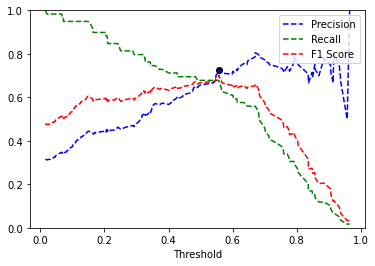

In [61]:
from sklearn.metrics import precision_recall_curve

y_scores = model.predict_proba(X_test)

prec, rec, tre = precision_recall_curve(y_test, y_scores[:,1])

def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    f_score = (2*prec*rec)/(prec+rec)
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'Recall')
    plt.plot(thresholds, f_score[:-1], 'r--', label = 'F1 Score')
    plt.xlabel('Threshold')
    plt.legend(loc='upper right')
    plt.ylim([0,1])

plot_prec_recall_vs_tresh(prec, rec, tre)

f_score = (2*prec*rec)/(prec+rec)

index = np.where(f_score == max(f_score))
thresholdOpt = tre[index]
print("Optimum Threshold is {}".format(tre[index]))
print("Precision at Optimum Threshold is {}".format(prec[index]))
print("Recall at Optimum Threshold is {}".format(rec[index]))


plt.scatter(tre[index], prec[index], marker='o', color='black', label='Best')
plt.show()